In [72]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

In [40]:
os.chdir("/Users/tanmaybirar/Documents/ML/Heath Costs/")
df = pd.read_csv('insurance.csv')

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [42]:
df['expenses'].describe()

count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64

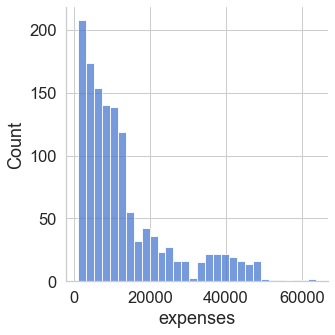

In [43]:
sns.displot(df['expenses'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


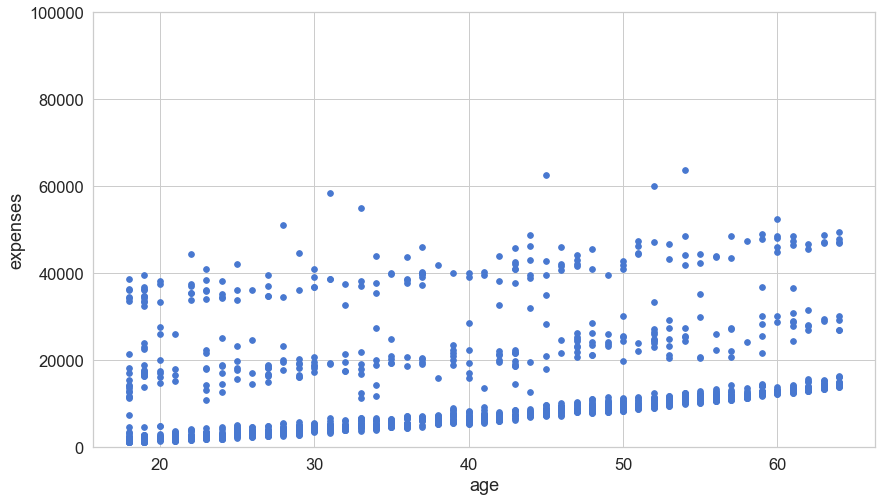

In [45]:
var = 'age'
data = pd.concat([df['expenses'], df[var]], axis=1)
data.plot.scatter(x=var, y='expenses', ylim=(0,100000), s=32);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


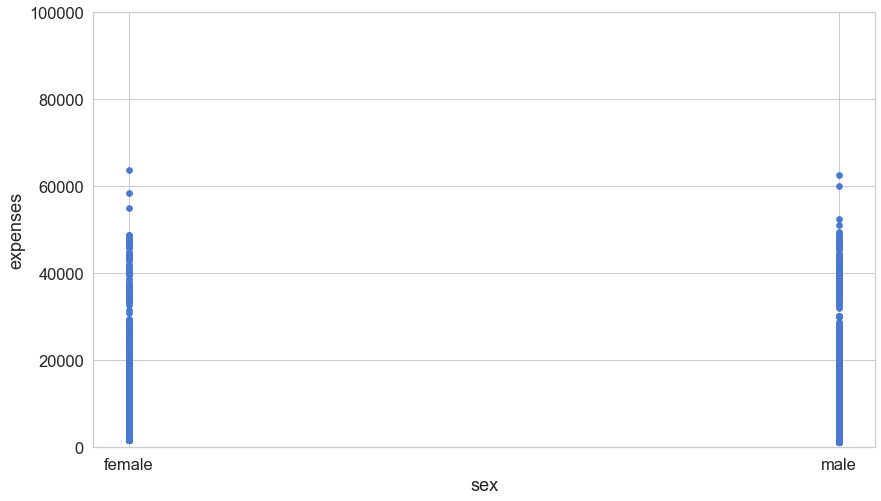

In [46]:
var = 'sex'
data = pd.concat([df['expenses'], df[var]], axis=1)
data.plot.scatter(x=var, y='expenses', ylim=(0,100000), s=32);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


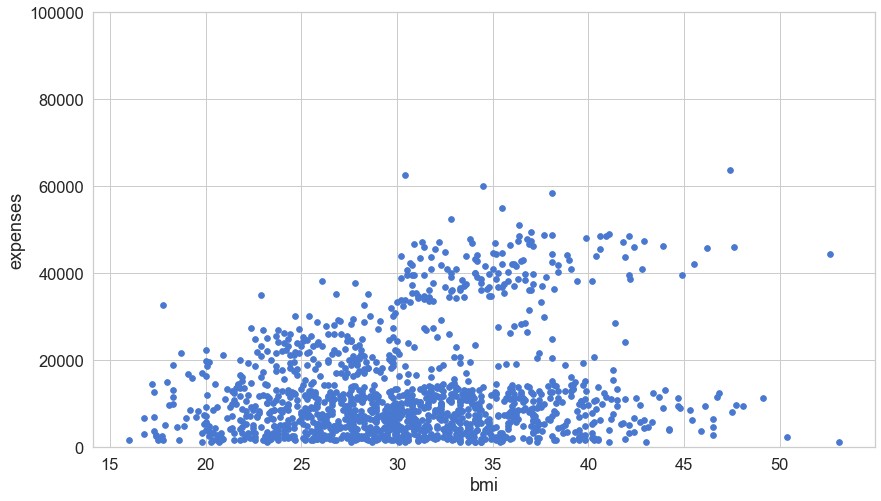

In [47]:
var = 'bmi'
data = pd.concat([df['expenses'], df[var]], axis=1)
data.plot.scatter(x=var, y='expenses', ylim=(0,100000), s=32);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


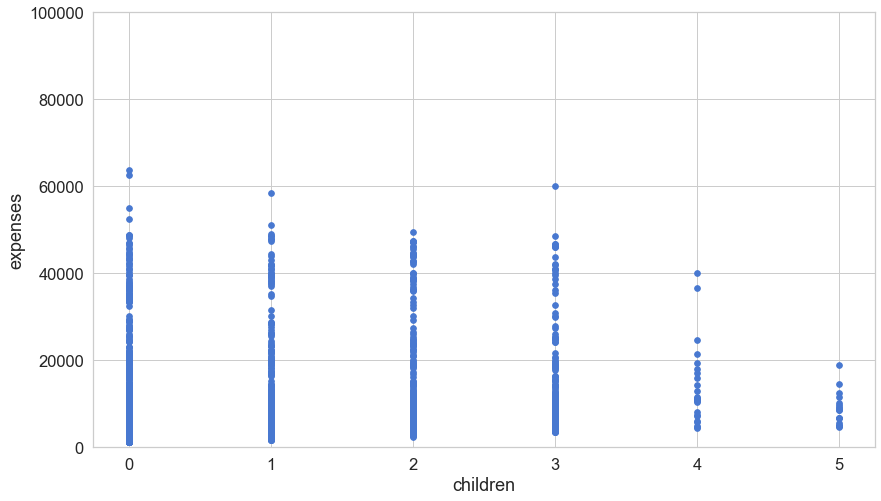

In [48]:
var = 'children'
data = pd.concat([df['expenses'], df[var]], axis=1)
data.plot.scatter(x=var, y='expenses', ylim=(0,100000), s=32);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


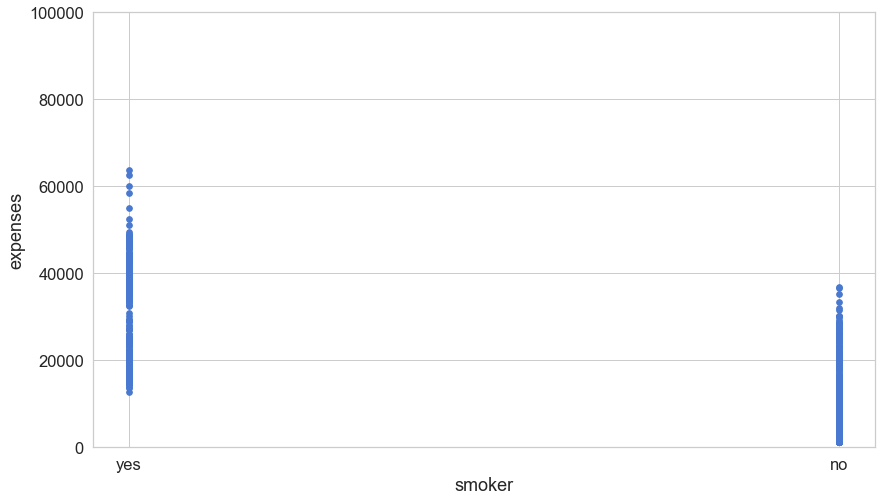

In [49]:
var = 'smoker'
data = pd.concat([df['expenses'], df[var]], axis=1)
data.plot.scatter(x=var, y='expenses', ylim=(0,100000), s=32);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


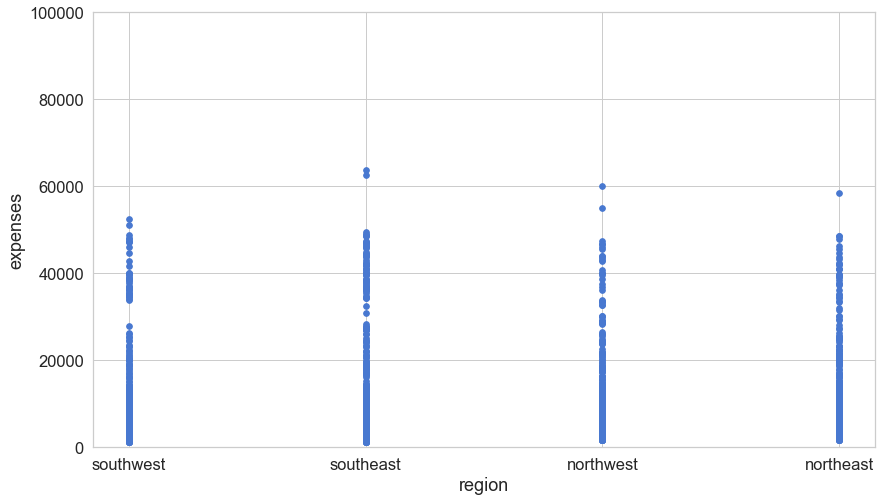

In [50]:
var = 'region'
data = pd.concat([df['expenses'], df[var]], axis=1)
data.plot.scatter(x=var, y='expenses', ylim=(0,100000), s=32);

In [51]:
"""Handle Catergorical Variables """

df["sex"].replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)
df["smoker"].replace(to_replace=['no', 'yes'], value=[0 ,1], inplace=True)
df["region"] = df["region"].replace(to_replace=['northeast', 'northwest', 'southeast', 'southwest'], value=[0,1,2,3])


In [52]:
""" BMI, Smoker, Children > 3"""

' BMI, Smoker, Children > 3'

<ipython-input-53-0e60c1ddd108>:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cax)


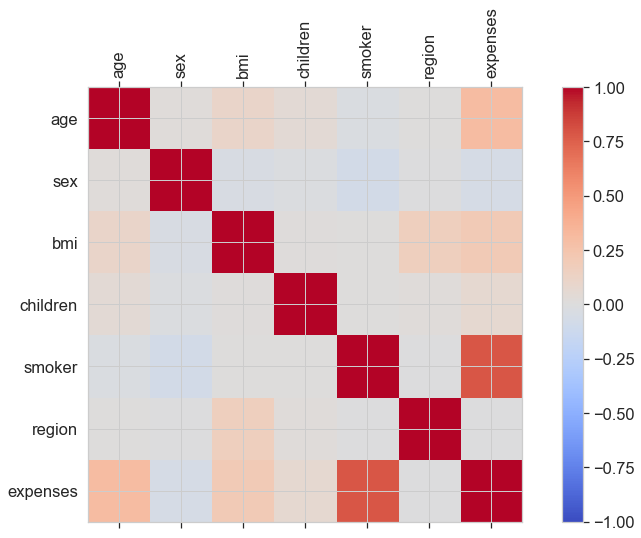

In [53]:
""" Corr """
corr_check = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_check, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [54]:
#reminder to trim the dataframe

df = df[df["bmi"]<45]

""" Separate labels"""

X = df[["bmi", "smoker", "children"]]
y = df["expenses"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
""" refer to: https://www.geeksforgeeks.org/medical-insurance-price-prediction-using-machine-learning-python/"""

' refer to: https://www.geeksforgeeks.org/medical-insurance-price-prediction-using-machine-learning-python/'

In [56]:
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

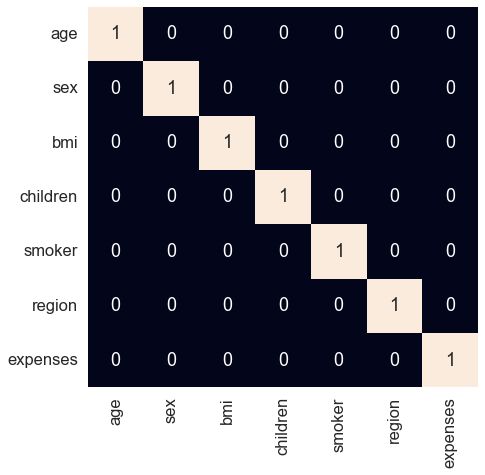

In [57]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [99]:
features = df.drop('expenses', axis=1)
target = df['expenses']
train_dataset, test_dataset, train_labels, test_labels = train_test_split(features, target,test_size=0.2,random_state=22)
train_dataset.shape, test_dataset.shape

((1054, 6), (264, 6))

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [70]:
models = [LinearRegression(), XGBRegressor(),
		RandomForestRegressor(), AdaBoostRegressor(),
		Lasso(), Ridge()]

for i in range(6):
	models[i].fit(X_train, Y_train)

	# print(f'{models[i]} : ')
	# pred_train = models[i].predict(X_train)
	# print('Training Error : ', mape(Y_train, pred_train))

	# pred_val = models[i].predict(X_val)
	# print('Validation Error : ', mape(Y_val, pred_val))
	# print()

	print(f'{models[i]}: ')
	pred_train = models[i].predict(X_train)
	print('Training Error : ', mae(Y_train, pred_train))

	print(f'{models[i]}: ')
	pred_val = models[i].predict(X_val)
	print('Validation Error : ', mae(Y_val, pred_val))


LinearRegression(): 
Training Error :  4113.862668285721
LinearRegression(): 
Validation Error :  4407.102322084373
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...): 
Training Error :  508.2538826003247
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
     

In [ ]:
""" Test individually: [LinearRegression(), XGBRegressor(),
		RandomForestRegressor(), AdaBoostRegressor(),
		Lasso(), Ridge()]"""

In [71]:
# ridge_reg = Ridge(alpha=1, solver="cholesky")
# ridge_reg.fit(X_train,Y_train)
# ridge_reg.predict(X_val)

# pred_train = ridge_reg.predict(X_train)
# print('Training Error: ', mae(Y_train, pred_train))

# pred_val = ridge_reg.predict(X_val)
# print('Validation Error: ', mae(Y_val, pred_val))

Training Error:  4114.801492151866
Validation Error:  4408.7318825854945


In [ ]:
# print(f'{models[i]}: ')
# pred_train = models[i].predict(X_train)
# print('Training Error : ', mae(Y_train, pred_train))

# print(f'{models[i]}: ')
# pred_val = models[i].predict(X_val)
# print('Validation Error : ', mae(Y_val, pred_val))

In [ ]:
# sgd_reg = SGDRegressor(penalty="12")
# sgd_reg.fit(X_train, Y_train.ravel())

# pred_train = sgd_reg.predict(X_train)
# pred_val = sgd_reg.predict(X_val)

# print("Training Error: ", mae(Y_train, pred_train))
# print("Validation Error: ", mae(Y_val, pred_val))


In [78]:
# """ Reconducting XGB (reported lowest MAE)"""
# xgb_reg = XGBRegressor()
# xgb_reg.fit(X_train,Y_train)
# xgb_reg.predict(X_val)

# pred_train = xgb_reg.predict(X_train)
# print('Training Error: ', mae(Y_train, pred_train))

# pred_val = xgb_reg.predict(X_val)
# print('Validation Error: ', mae(Y_val, pred_val))

Training Error:  508.2538826003247
Validation Error:  3070.1720598925967


In [81]:
# lass_reg = Lasso()
# lass_reg.fit(X_train,Y_train)
# lass_reg.predict(X_val)

# pred_train = lass_reg.predict(X_train)
# print('Training Error: ', mae(Y_train, pred_train))

# pred_val = lass_reg.predict(X_val)
# print('Validation Error: ', mae(Y_val, pred_val))

Training Error:  4113.675784257564
Validation Error:  4407.104977475725


In [82]:
# lin_reg = LinearRegression()
# lin_reg.fit(X_train,Y_train)
# lin_reg.predict(X_val)

# pred_train = lin_reg.predict(X_train)
# print('Training Error: ', mae(Y_train, pred_train))

# pred_val = lin_reg.predict(X_val)
# print('Validation Error: ', mae(Y_val, pred_val))

Training Error:  4113.862668285721
Validation Error:  4407.102322084373


In [101]:
model = RandomForestRegressor()
history = model.fit(train_dataset,train_labels)
model.predict(test_dataset)

pred_train = model.predict(train_dataset)
print('Training Error: ', mae(test_dataset, pred_train))

pred_val = model.predict(train_labels)
print('Validation Error: ', mae(test_labels, pred_val))

In [ ]:
plt.scatter(X_train, test_lab, color = "red")
plt.plot(X_train, rf_reg.predict(X_train), color = "green")
plt.title("Salary vs Experience (Testing set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [85]:
# adb_reg = AdaBoostRegressor()
# adb_reg.fit(X_train,Y_train)
# adb_reg.predict(X_val)

# pred_train = adb_reg.predict(X_train)
# print('Training Error: ', mae(Y_train, pred_train))

# pred_val = adb_reg.predict(X_val)
# print('Validation Error: ', mae(Y_val, pred_val))

Training Error:  3920.32440031239
Validation Error:  3872.5799048208455


In [39]:
""" PROCESS WITH KERAS BEGINS HERE"""
#REMEMBER TO SWITCH TO AN ENVIRONMENT WHICH SUPPORTS TENSORFLOW

# Import libraries. You may or may not use all of these.



import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

import warnings
warnings.filterwarnings("ignore")

In [40]:
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

zsh:1: command not found: wget


,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [41]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [42]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [43]:
for column in dataset:
    if dataset[column].nunique() < 10:
        print(column, "=", pd.unique(dataset[column]))
    else:
        print(column, "have", dataset[column].nunique(), "different values.")

age have 47 different values.
sex = ['female' 'male']
bmi have 275 different values.
children = [0 1 3 2 5 4]
smoker = ['yes' 'no']
region = ['southwest' 'southeast' 'northwest' 'northeast']
expenses have 1337 different values.


In [44]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

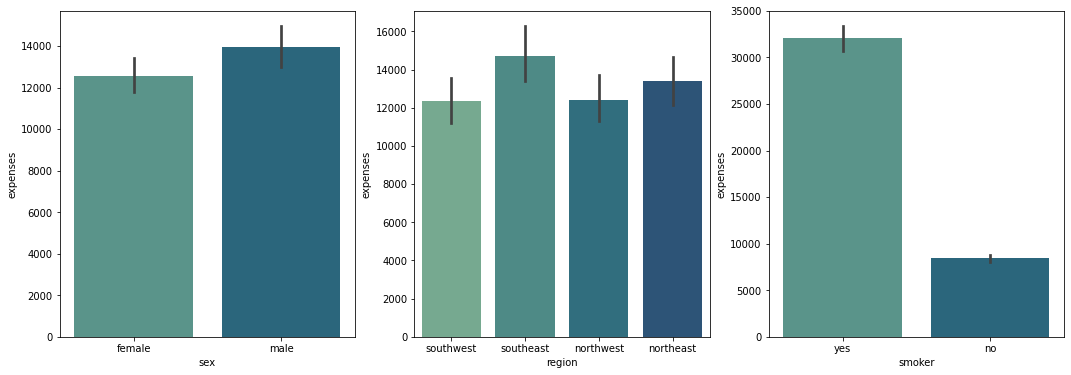

In [45]:
""" Visualization """

fig, ax = plt.subplots(1,3, figsize=(18,6))

i = 1
for column in ['sex', 'region', 'smoker']:
    plt.subplot(1, 3, i)
    ax = sns.barplot(
        data=dataset,
        x=column,
        y='expenses',
        palette="crest"
    )
    i += 1

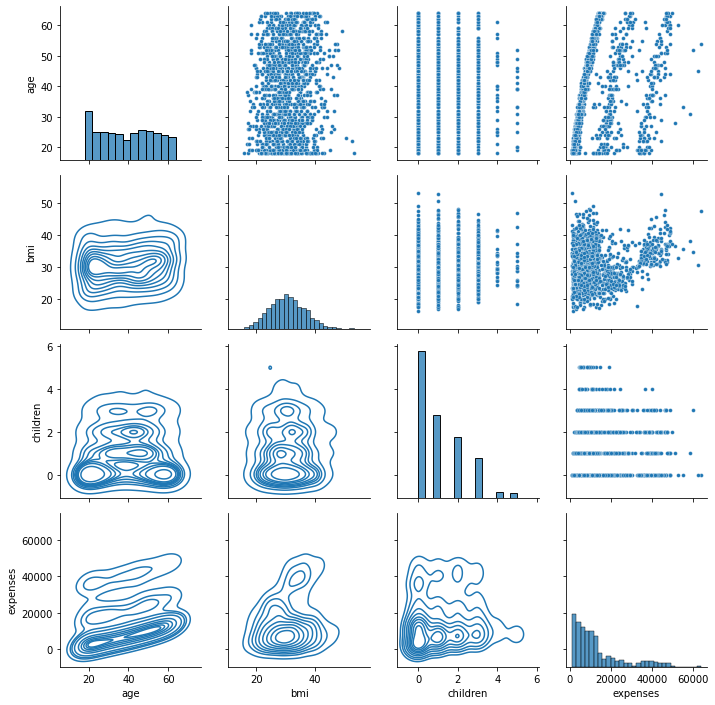

In [46]:
g = sns.PairGrid(
    dataset[['age', 'bmi', 'children' ,'expenses']]
)
g.map_upper(sns.scatterplot, s=15)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)


In [47]:
""" Prepare Data """

prepared_data = dataset.copy()

In [48]:
prepared_data['smoker'] = prepared_data['smoker'].map({'no': 0, 'yes': 1})
prepared_data['sex'] = prepared_data['sex'].map({'female': 1, 'male': 0})

In [49]:
prepared_data = pd.get_dummies(
    prepared_data,
    columns=['region'],
    prefix='',
    prefix_sep=''
)

In [50]:
prepared_data.tail()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
1333,50,0,31.0,3,0,10600.55,0,1,0,0
1334,18,1,31.9,0,0,2205.98,1,0,0,0
1335,18,1,36.9,0,0,1629.83,0,0,1,0
1336,21,1,25.8,0,0,2007.95,0,0,0,1
1337,61,1,29.1,0,1,29141.36,0,1,0,0


In [51]:
""" Split Dataset """

from sklearn.model_selection import train_test_split

tts_data = prepared_data.copy()

X = tts_data.drop('expenses', axis=1)
y = tts_data.pop('expenses')

train_dataset, test_dataset, train_labels, test_labels = train_test_split(
    X, y,
    test_size=0.2
)

test_dataset.tail()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
39,60,0,39.9,0,1,0,0,0,1
1323,42,1,40.4,2,1,0,0,1,0
714,24,1,22.6,0,0,0,0,0,1
145,29,1,38.8,3,0,0,0,1,0
76,29,1,29.6,1,0,0,0,1,0


In [52]:
""" Normalization """

from tensorflow.keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

In [53]:
""" Model """

model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(units=1)
])

In [60]:
""" Set Parameters """

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss=['mean_absolute_error'], # Decides about pass the tests from website
    metrics=['mean_absolute_error', 'mean_squared_error']  # mse is required in tests from website
)

In [61]:
import warnings
warnings.filterwarnings("ignore")

In [62]:
history = model.fit(
    train_dataset, 
    train_labels,
    epochs=50,
    verbose=0,
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [63]:
""" Results """

model.evaluate(
    test_dataset,
    test_labels,
    verbose=1
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
9/9 [==============================] - 0s 444us/step - loss: 2227.5928 - mean_absolute_error: 2227.5928 - mean_squared_error: 26071692.0000


[2227.5927734375, 2227.5927734375, 26071692.0]

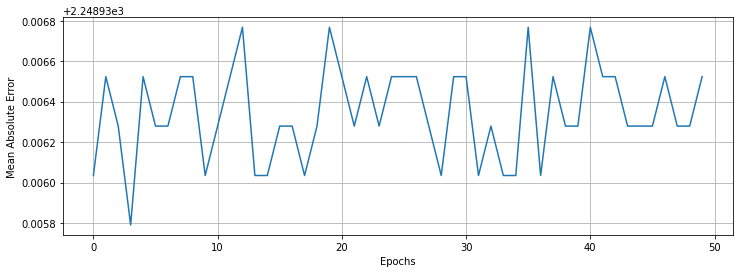

In [64]:
""" Chart for model fit """

plt.figure(figsize=(12,4))
plt.plot(
    history.history['mean_absolute_error']
)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.grid(True)
plt.show()

9/9 - 0s - loss: 2227.5928 - mean_absolute_error: 2227.5928 - mean_squared_error: 26071692.0000
Testing set Mean Abs Error: 2227.59 expenses
You passed the challenge. Great job!


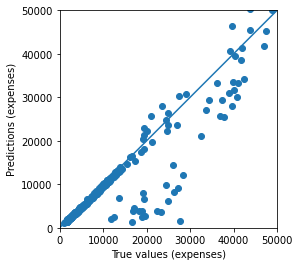

In [66]:
""" FCC Tests """

# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)


# import warnings
# warnings.filterwarnings("ignore")